In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Named Entity Recognition (NER) Performance Analysis on DialogRE Dataset

This Jupyter notebook aims to evaluate the performance of Spacy's Named Entity Recognition (NER) on the DialogRE dataset. 

- **Objective**: Our primary focus is to compare Spacy's NER performance against the ground truth present in the dataset. 
- **Process**: We ingest the DialogRE dataset, apply Spacy's NER, and further enrich the data with NER results. Various metrics like Precision, Recall, and F1 scores are computed for the analysis.
- **Analysis**: Our analysis primarily revolves around understanding the performance of Spacy's NER by examining the distribution of correct predictions, missing entities from ground truth, and entities missing from predictions.

Proceed to the code section for the detailed implementation.


In [19]:
from src.paths import LOCAL_PROCESSED_DATA_PATH
from src.processing.dialogre_processing import DialogREDatasetTransformer
from src.processing.ner_evaluator import EntityMetricsEvaluator
from src.processing.dataframe_utils import get_counts_and_percentages


dt = DialogREDatasetTransformer(LOCAL_PROCESSED_DATA_PATH / 'dialog-re-with-no-relation')
df1 = dt.load_data_to_dataframe()


evaluator = EntityMetricsEvaluator(df1)
df2 = evaluator.enrich_data()
df2

,Dialogue,Relations,Origin,PredictedEntities,AnnotatedEntities,StandardizedAnnotatedEntities,Precision,Recall,F1,MissingFromGroundTruth,MissingFromPredictions,CorrectPredictions
0,"[Speaker 1: Hey!, Speaker 2: Hey., Speaker 3: ...","[{'y': 'casting director', 'x': 'Ann', 'rid': ...",dev,"[Estelle:ORG, Katelynn:PERSON, Ann:PERSON, 5:C...","[Pheebs:PER, Estelle:PER, man:STRING, agent:ST...","[Pheebs:PERSON, Estelle:PERSON, man:STRING, ag...",0.300000,0.600000,0.400000,"[weeks:DATE, Estelle:ORG, Chandler:PERSON, fir...","[Pheebs:PERSON, man:STRING, agent:STRING, cast...","[Annie:PERSON, Katelynn:PERSON, Ann:PERSON, Es..."
1,"[Speaker 1, Speaker 2: Hi, Speaker 3: Hi! Hey ...","[{'y': 'Speaker 2', 'x': 'Speaker 1', 'rid': [...",dev,"[Jack:PERSON, 4:CARDINAL, 2:CARDINAL, 3:CARDIN...",[Jack:PER],[Jack:PERSON],0.166667,1.000000,0.285714,"[4:CARDINAL, 2:CARDINAL, 35 years:DATE, 3:CARD...",[],[Jack:PERSON]
2,"[Speaker 1, Speaker 2: Hi!, Speaker 3: Hey!, S...","[{'y': 'man', 'x': 'Speaker 4', 'rid': [37], '...",dev,"[Ross:PERSON, first:ORDINAL, 4:CARDINAL, 2:CAR...","[dad:STRING, man:STRING, Emma:PER, Mr. Geller:...","[dad:STRING, man:STRING, Emma:PERSON, Mr. Gell...",0.200000,0.285714,0.235294,"[Ross:PERSON, first:ORDINAL, 4:CARDINAL, 2:CAR...","[Mrs. Geller:PERSON, dad:STRING, man:STRING, o...","[Geller:PERSON, Emma:PERSON]"
3,[Speaker 1: Wow! It looks like we got a lot of...,"[{'y': 'baby', 'x': 'Speaker 2', 'rid': [37], ...",dev,"[Ross:PERSON, 2:CARDINAL, eight weeks:DATE, 3:...","[baby:STRING, roomie:STRING]","[baby:STRING, roomie:STRING]",0.000000,0.000000,0.000000,"[Ross:PERSON, 2:CARDINAL, eight weeks:DATE, 3:...","[baby:STRING, roomie:STRING]",[]
4,"[Speaker 1: Now, Mom, everything's going fine,...","[{'y': '26', 'x': 'Speaker 1', 'rid': [25], 'r...",dev,"[only 26:CARDINAL, Ross:PERSON, 1:CARDINAL]","[Ross:PER, 26:VALUE]","[Ross:PERSON, 26:CARDINAL]",0.333333,0.500000,0.400000,"[only 26:CARDINAL, 1:CARDINAL]",[26:CARDINAL],[Ross:PERSON]
...,...,...,...,...,...,...,...,...,...,...,...,...
1783,"[Speaker 1: Nice camoflauge man, for a minute ...","[{'y': 'Speaker 1', 'x': 'Speaker 2', 'rid': [...",train,"[Chandler:PERSON, Chandler Bing:PERSON, 2:CARD...","[man:STRING, Susie Moss:PER, Chandler Bing:PER]","[man:STRING, Susie Moss:PERSON, Chandler Bing:...",0.200000,0.666667,0.307692,"[Chandler:PERSON, 2:CARDINAL, fourth:ORDINAL, ...",[man:STRING],"[Chandler Bing:PERSON, Susie Moss:PERSON]"
1784,"[Speaker 1: Well, I'm sure you'll teach her a ...","[{'y': 'Sir', 'x': 'Speaker 1', 'rid': [37], '...",train,"[Wednesday:DATE, 2:CARDINAL, Tuesday:DATE, 3:C...","[Bing:PER, sir:STRING, Sir:STRING]","[Bing:PERSON, sir:STRING, Sir:STRING]",0.111111,0.333333,0.166667,"[Wednesday:DATE, 2:CARDINAL, Tuesday:DATE, 3:C...","[sir:STRING, Sir:STRING]",[Bing:PERSON]
1785,[Speaker 1: You know what? I can't even worry ...,"[{'y': 'baby', 'x': 'Speaker 1', 'rid': [37], ...",train,"[shh shhh:PERSON, Rach:PERSON, 2:CARDINAL, 1:C...","[baby:STRING, little girl:STRING, Rach:PER]","[baby:STRING, little girl:STRING, Rach:PERSON]",0.250000,0.333333,0.285714,"[shh shhh:PERSON, 2:CARDINAL, 1:CARDINAL]","[baby:STRING, little girl:STRING]",[Rach:PERSON]
1786,"[Speaker 1: And cut. Hey, Butt Guy, what the h...","[{'y': 'Butt Guy', 'x': 'Speaker 2', 'rid': [3...",train,"[2:CARDINAL, Butt Guy:PERSON, 1:CARDINAL]",[Butt Guy:PER],[Butt Guy:PERSON],0.333333,1.000000,0.500000,"[2:CARDINAL, 1:CARDINAL]",[],[Butt Guy:PERSON]


,Precision,Recall,F1
count,1788.000000,1788.000000,1788.000000
mean,0.136069,0.449640,0.191044
std,0.129171,0.372422,0.170604
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.125000,0.428571,0.181818
75%,0.222222,0.750000,0.309717
max,0.714286,1.000000,0.800000


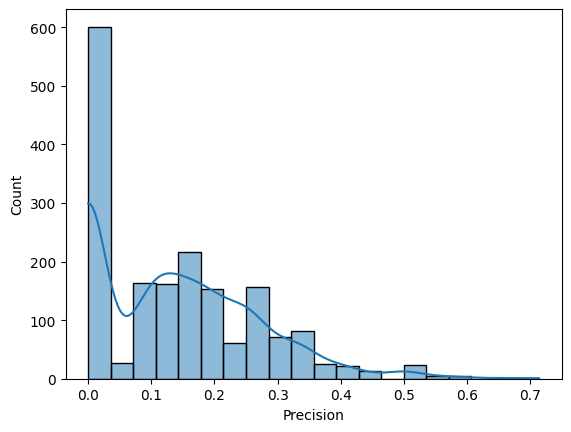

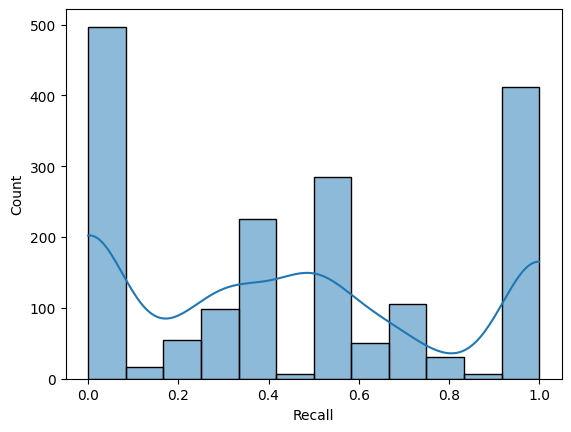

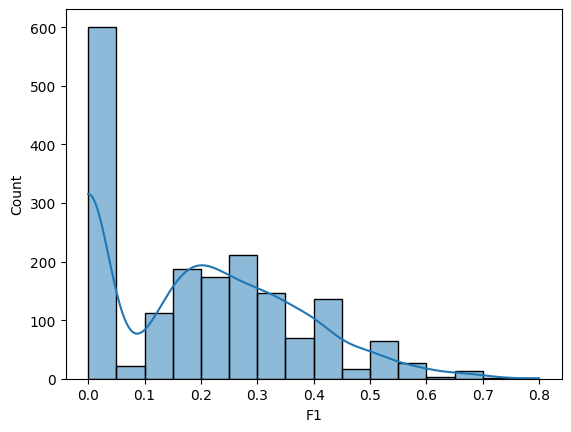

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame containing the metrics columns
metrics_df = df2[['Precision', 'Recall', 'F1']]

# Create separate figures for each metric
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()

# Plot histogram for Precision in Figure 1
plt.figure(fig1.number)
sns.histplot(data=metrics_df, x='Precision', kde=True)

# Plot histogram for Recall in Figure 2
plt.figure(fig2.number)
sns.histplot(data=metrics_df, x='Recall', kde=True)

# Plot histogram for F1 in Figure 3
plt.figure(fig3.number)
sns.histplot(data=metrics_df, x='F1', kde=True)

display(df2.describe())

# Show the plots
plt.show()

In [5]:
df2.PredictedEntities.explode().dropna().shape, df2.AnnotatedEntities.explode().dropna().shape

((14507,), (4952,))

In [6]:
col = 'CorrectPredictions'
tmp = df2[col].explode().dropna()
print(f'# {col} - Entity Value Counts (Total: {tmp.shape[0]})')
print(tmp.value_counts())
print(f'\n\n# {col} - Entity Type Value Counts')
print(tmp.apply(lambda x: x.split(':')[1]).value_counts())

# CorrectPredictions - Entity Value Counts (Total: 1968)
Rach:PERSON             155
Ross:PERSON              80
Rachel:PERSON            78
Monica:PERSON            70
Chandler:PERSON          63
                       ... 
Delaware:GPE              1
Mental Geller:PERSON      1
Stu Vincent:PERSON        1
Brooklyn:GPE              1
Racquela:PERSON           1
Name: CorrectPredictions, Length: 661, dtype: int64


# CorrectPredictions - Entity Type Value Counts
PERSON      1785
GPE          122
ORG           34
CARDINAL      27
Name: CorrectPredictions, dtype: int64


In [7]:
col = 'MissingFromGroundTruth'
tmp = df2[col].explode().dropna()
print(f'# {col} - Entity Value Counts (Total: {tmp.shape[0]})')
print(tmp.value_counts())
print(f'\n\n# {col} - Entity Type Value Counts')
print(tmp.apply(lambda x: x.split(':')[1]).value_counts())

# MissingFromGroundTruth - Entity Value Counts (Total: 12539)
1:CARDINAL                  1788
2:CARDINAL                  1781
3:CARDINAL                  1154
4:CARDINAL                   629
Ross:PERSON                  338
                            ... 
Stockholm:GPE                  1
Reruns:ORG                     1
Pinocchio:PERSON               1
twelve - year - old:DATE       1
Bella Phoebe !:PERSON          1
Name: MissingFromGroundTruth, Length: 2496, dtype: int64


# MissingFromGroundTruth - Entity Type Value Counts
CARDINAL                      6594
PERSON                        3041
DATE                           950
TIME                           523
ORG                            400
ORDINAL                        322
GPE                            218
NORP                           104
MONEY                           86
WORK_OF_ART                     83
FAC                             43
PRODUCT                         37
LOC                             29
EVENT    

In [8]:
col = 'MissingFromPredictions'
tmp = df2[col].explode().dropna()
print(f'# {col} - Entity Value Counts (Total: {tmp.shape[0]})')
print(tmp.value_counts())
print(f'\n\n# {col} - Entity Type Value Counts')
print(tmp.apply(lambda x: x.split(':')[1]).value_counts())

# MissingFromPredictions - Entity Value Counts (Total: 2984)
honey:STRING               159
man:STRING                 149
Pheebs:PERSON              145
baby:STRING                117
my friend:STRING            71
                          ... 
professor Wealer:PERSON      1
USO:ORG                      1
comedian:STRING              1
greeter girl:STRING          1
The mistress:STRING          1
Name: MissingFromPredictions, Length: 1068, dtype: int64


# MissingFromPredictions - Entity Type Value Counts
STRING      2105
PERSON       752
ORG           58
CARDINAL      54
GPE           15
Name: MissingFromPredictions, dtype: int64


In [9]:
evaluator.validate_metrics(10)

# SAMPLE INSPECTION - #10


----------------------------------------
## GT: MissingFromPredictions (FN=2)
----------------------------------------
Learning Extension:ORG
actor:STRING
----------------------------------------
## PREDICTIONS: MissingFromGroundTruth (FP=7)
----------------------------------------
2:CARDINAL
4:CARDINAL
5:CARDINAL
the Learning Extension:FAC
1:CARDINAL
3:CARDINAL
6:CARDINAL
----------------------------------------
## PREDICTIONS: CorrectPredictions (TP=0)
----------------------------------------

----------------------------------------
## VALIDATED METRICS
### Post-computed (counts above)
----------------------------------------
- Precision: 0.0% 	TP / (TP + FP) = 0 / (0 + 7)
- Recall:    0.0% 	TP / (TP + FN) = 0 / (0 + 2)
- F1 Score:  0.0% 	2 * Pre * Rec / (Prec + Rec) = 2 * 0.0% * 0.0% / (0.0% + 0.0%)
